# Title: Analysis of Medical Appointments

## Table of Contents
<ul>
    <li><a href='#introduction'>Introduction</a></li>
    <li><a href='#question'>Question</a></li>
    <li>
        <a href='#wrangle'>Data Wrangling</a>
        <ul>
            <li><a href='#load-data'>Load Data</a></li>
            <li><a href='#data-desc'>Data Description</a></li>
            <li><a href='#gen-sta'>General Statistics</a></li>
            <li><a href='#data-clean'>Data Cleaning</a></li>
        </ul>
    </li>
    <li><a href='#eda'>Exploratory Data Analysis</a></li>
    <li><a href='#conclusion'>Conclusions</a></li>
</ul>

<a id='introduction'></a>
# Introduction

> Appointments made and should be honored by both parties involve. Unfortunately, that is not always the case. Hence, this analysis examines and analyse medical appointments made with the aim of establishing patterns and trends while trying to find out who is more likely to miss his/her appointment.

<a id='question'></a>
# Questions

> The questions posed will enable a deeper understanding into patterns and relationships between different features that make up the data. The questions are but not limited to the following:
> <ol>
    <li>Does gender play a role in a patient showing up or not for an appointment?</li>
    <li>Is there a prevalence of patients not showing up in certain neighbourhoods?</li>
    <li>Are Patients under scholarship more likely to show up for appointments?</li>
    <li>Is alcoholism a determining factor in a patient not showing up?</li>
    <li>Is age a contributing factor for patients ahowing up or not to their appointments?</li>
</ol>

<a id='wrangle'></a>
# Data Wrangling

> Data wrangling—also called data cleaning, data remediation, or data munging—refers to a variety of processes designed to transform raw data into more readily used formats. The exact methods differ from project to project depending on the data you’re leveraging and the goal you’re trying to achieve [[1](https://online.hbs.edu/blog/post/data-wrangling)].

<a id='load-data'></a>
## Load Data

In [1]:
# import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# load data

df = pd.read_csv('../databases/Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='data-desc'></a>
## Data description

> <ul>
    <li><strong>PatientId:</strong> A unique identifier for each patient. </li>
    <li><strong>AppointmentID:</strong> An identifier for each appointment. </li>
    <li><strong>Gender:</strong> This defines the gender of the patient (male or female).</li>
    <li><strong>ScheduledDay:</strong> This defines the day the appointment was scheduled. </li>
    <li><strong>AppointmentDay:</strong> This defines the day of the scheduled appointment.</li>
    <li><strong>Age:</strong> This defines the age of the patient.</li>
    <li><strong>Neighbourhood:</strong> Indicates the location of the hospital. </li>
    <li><strong>Scholarship:</strong> Indicates whether or not the patient is enrolled in the Brasillian welfare program.</li>
    <li><strong>Hipertension:</strong> </li>
    <li><strong>Diabetes:</strong> </li>
    <li><strong>Alcoholism:</strong> </li>
    <li><strong>Handcap:</strong> </li>
    <li><strong>SMS_received:</strong> defines wether or not the patient recieved an SMS.</li>
    <li><strong>No-show:</strong> Defines whether or not the patient shoowed up for the appointment. </li>
  </ul>

<a id='gen-sta'></a>
## General statistics

In [3]:
print(f'{df.shape[0]} rows \n{df.shape[1]} columns')

110527 rows 
14 columns


In [4]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


The Data as seen does not contain null values.

<a id='data-clean'></a>
## Data Cleaning

> As seen above, the minimum age is a negative number and age cannot be a negative number, hence, drop row containing -1 as age.

In [6]:
# Drop any row with Age lenn than zero (0)

df = df[df.Age>= 0]

In [7]:
# Check for duplicated data

df.duplicated().sum()

0

In [8]:
df.drop(columns=['PatientId', 'AppointmentID'], inplace=True);

<a id='eda'></a>
# Exploratory Data Analysis

> Exploratory data analysis (EDA) is used by data scientists to analyze and investigate data sets and summarize their main characteristics, often employing data visualization methods. It helps determine how best to manipulate data sources to get the answers you need, making it easier for data scientists to discover patterns, spot anomalies, test a hypothesis, or check assumptions [[2](https://www.ibm.com/cloud/learn/exploratory-data-analysis#:~:text=Exploratory%20data%20analysis%20%28EDA%29%20is%20used%20by%20data,spot%20anomalies%2C%20test%20a%20hypothesis%2C%20or%20check%20assumptions.)].

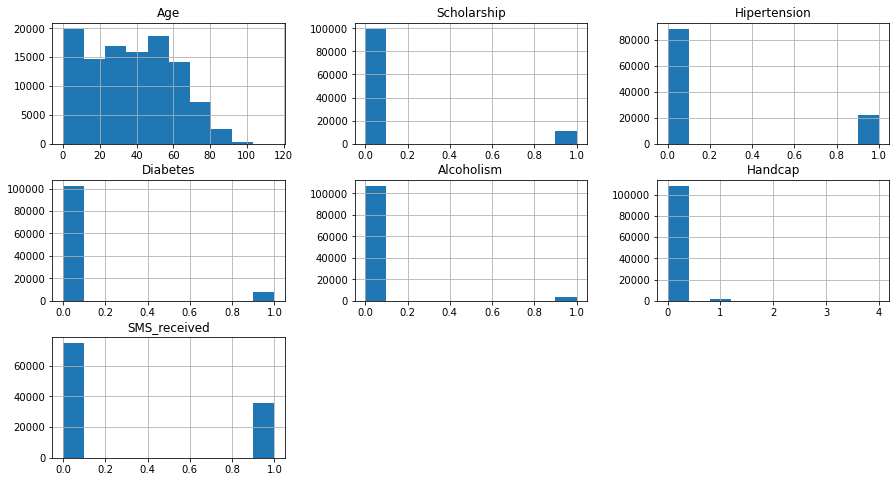

In [9]:
df.hist(figsize=(15,8));

### Gender

In [10]:
male = df[df.Gender == 'M']
female = df[df.Gender == 'F']

In [11]:
print(f'{male.shape[0]} Male patients \n{female.shape[0]} Female patients')

38687 Male patients 
71839 Female patients


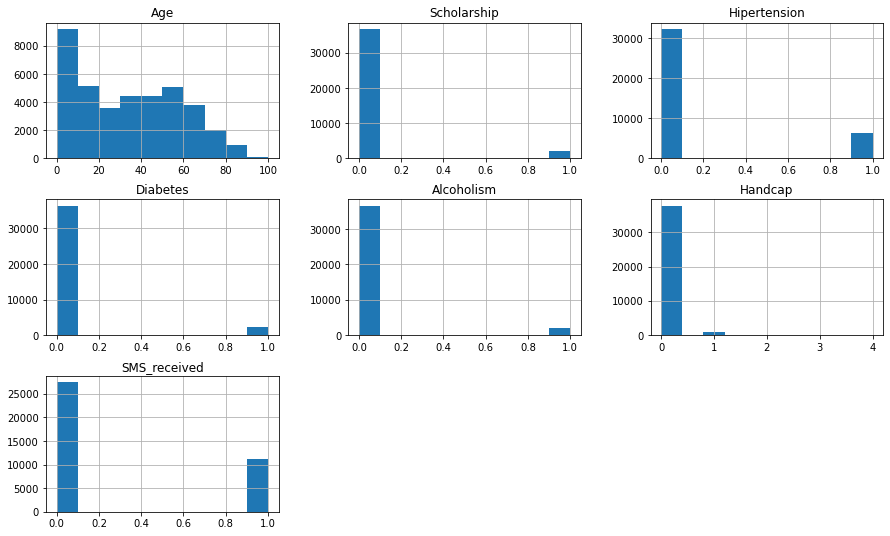

In [12]:
male.hist(figsize=(15, 9));

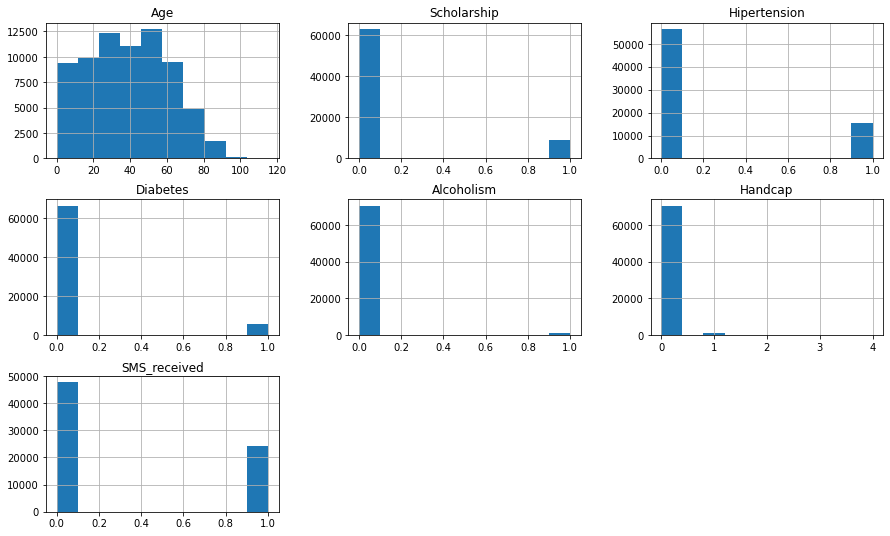

In [13]:
female.hist(figsize=(15, 9));

In [14]:
gender_df = df.groupby(['Gender', 'No-show'], as_index=False)['AppointmentDay'].count()

In [15]:
gender_df

,Gender,No-show,AppointmentDay
0,F,No,57245
1,F,Yes,14594
2,M,No,30962
3,M,Yes,7725


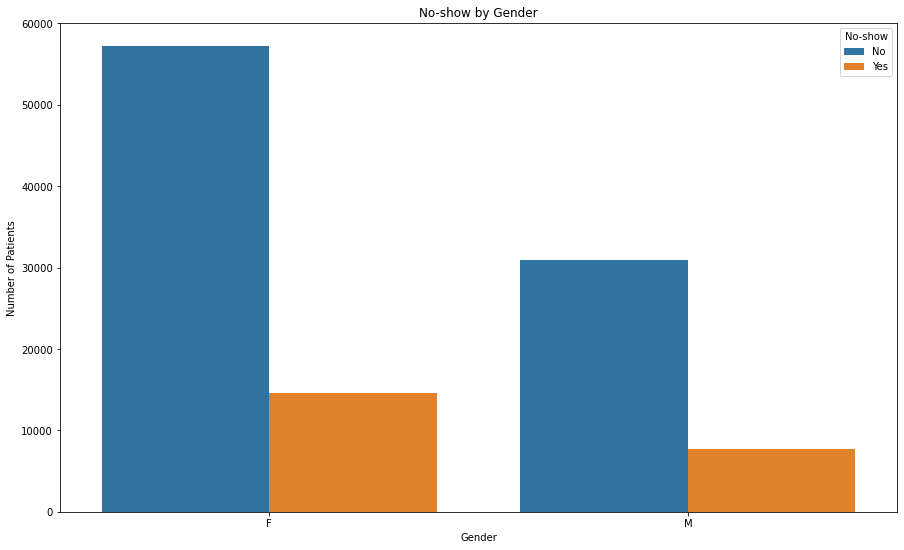

In [16]:
fig = plt.figure(figsize=(15, 9))

ax = sns.barplot(data=gender_df, y='AppointmentDay', x='Gender', hue='No-show');
ax.set(xlabel = 'Gender',
      ylabel = 'Number of Patients',
      title = 'No-show by Gender')

plt.show()

### Neighbourhood

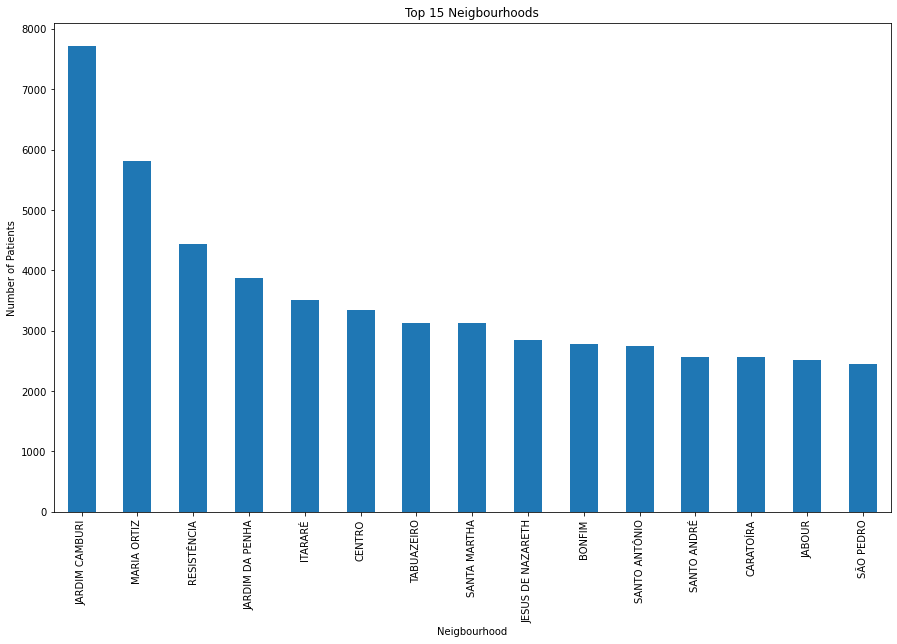

In [17]:
# Top 10 neigbourhoods with the highest number of patients

df.Neighbourhood.value_counts()[:15].plot(kind='bar', figsize=(15, 9), xlabel='Neigbourhood', ylabel='Number of Patients', title='Top 15 Neigbourhoods');

In [18]:
nbh = df.groupby(['Neighbourhood', 'No-show'], as_index=False)['Age'].count()

### scholarship

In [19]:
schp = df.groupby(['Scholarship', 'No-show'], as_index=False)['Age'].count()

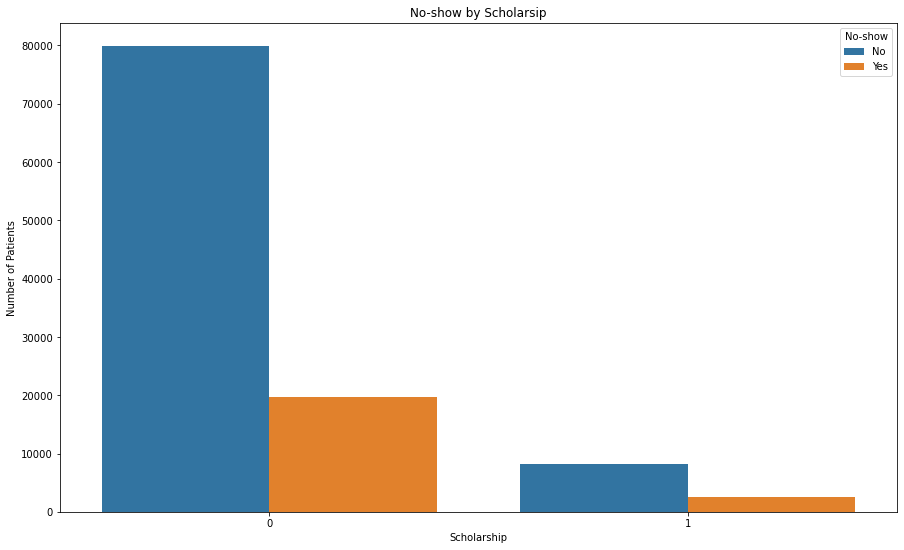

In [20]:
fig = plt.figure(figsize=(15, 9))

ax = sns.barplot(data=schp, y='Age', x='Scholarship', hue='No-show');
ax.set(xlabel = 'Scholarship',
      ylabel = 'Number of Patients',
      title = 'No-show by Scholarsip')

plt.show()

### Age

In [21]:
# Create a category and group the ages into different age grades

bins = [0, 2, 9, 19, 29, 39, 59, 79, df.Age.max()]
bin_labels = ['Infancy', 'Childhood', 'Adolescence', 'Early Adulthood', 'Adulthood', 'Middle Age', 'Early Elder', 'Late Elder']

In [22]:
df['Age_groups'] = pd.cut(df.Age, bins, labels=bin_labels)

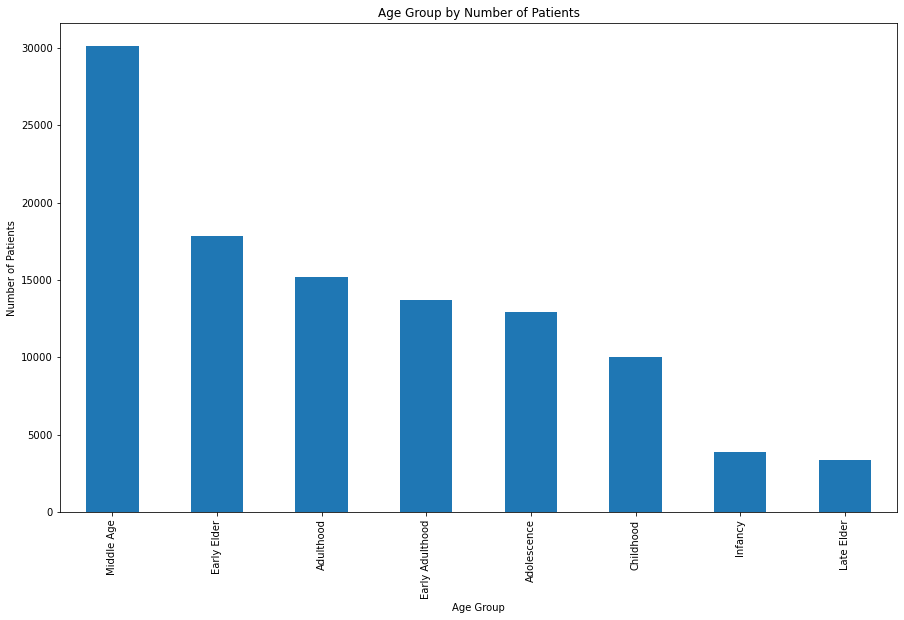

In [23]:
df.Age_groups.value_counts().plot(kind='bar', figsize=(15, 9), xlabel='Age Group', ylabel='Number of Patients', title='Age Group by Number of Patients');

In [24]:
age_grps = df.groupby(['Age_groups', 'No-show'], as_index=False)['Age'].count()

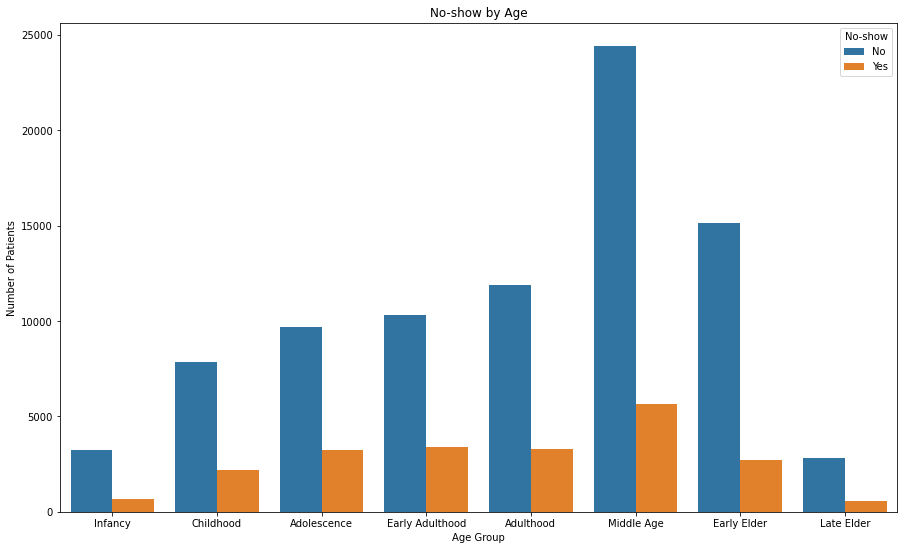

In [25]:
fig = plt.figure(figsize=(15, 9))

ax = sns.barplot(data=age_grps, y='Age', x='Age_groups', hue='No-show');
ax.set(xlabel = 'Age Group',
      ylabel = 'Number of Patients',
      title = 'No-show by Age')

plt.show()

In [26]:
# Create two mask dataframe for patients that show up and those that didn't show up

no_show = df[df['No-show'] == 'Yes']
show = df[df['No-show'] == 'No']

In [27]:
print(f'Overall, {no_show.shape[0]} failed to show up while {show.shape[0]} showed up')

Overall, 22319 failed to show up while 88207 showed up


In [28]:
# calculate thw average age for patients that show up and those that didn't show up

avg_age=df.groupby('No-show')['Age'].mean()

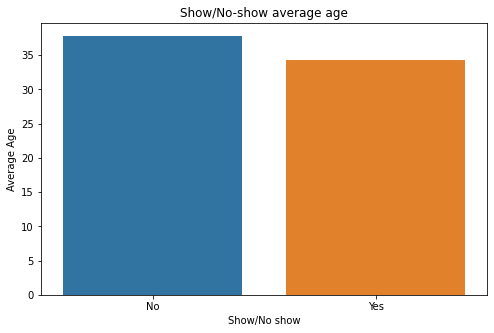

In [29]:
# Plotting results:
x=[1,2]
y=avg_age.values
fig=plt.figure(figsize=(8,5))
ax = sns.barplot(x=avg_age.index, y=y);

ax.set(ylabel = 'Average Age',
      xlabel = 'Show/No show',
      title = 'Show/No-show average age');


In [30]:
# calculate thw average age for patients that show up and those that didn't show up

avg_age_gender=df.groupby(['No-show', 'Gender'], as_index=False)['Age'].mean()

In [31]:
avg_age_gender

,No-show,Gender,Age
0,No,F,39.591126
1,No,M,34.461372
2,Yes,F,36.162190
3,Yes,M,30.833010


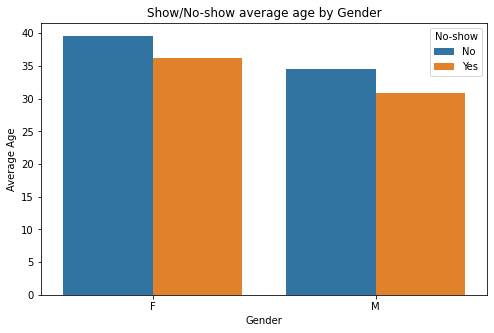

In [32]:
# Plotting results:
fig=plt.figure(figsize=(8,5))
ax = sns.barplot(data=avg_age_gender, x='Gender', y='Age', hue='No-show');

ax.set(ylabel = 'Average Age',
      xlabel = 'Gender',
      title = 'Show/No-show average age by Gender');

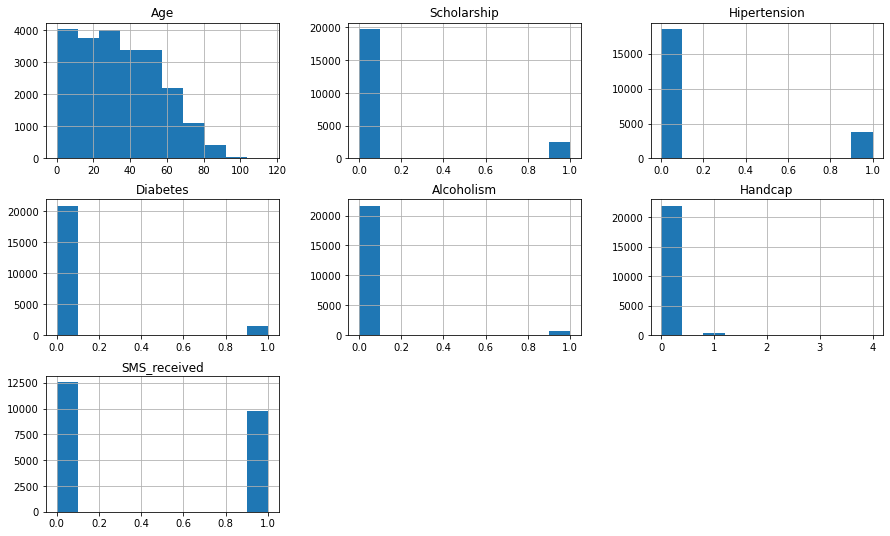

In [33]:
no_show.hist(figsize=(15, 9));

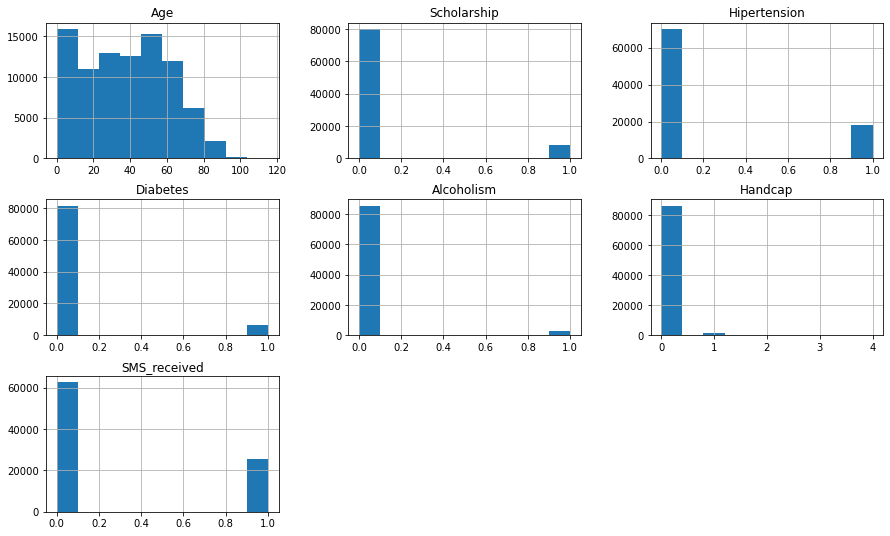

In [34]:
show.hist(figsize=(15, 9));

### Correlation matrix

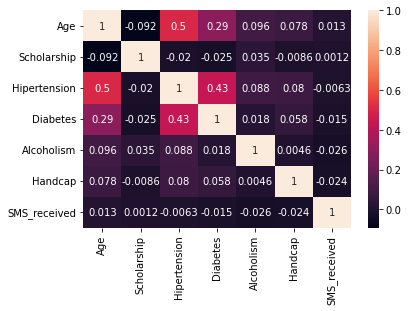

In [35]:
corr = df.corr()
sns.heatmap(corr, annot=True);

<a id='conclusion'></a>
# Conclusion

> The introduction goes here

> Whicg gender is more likely to miss an appointment?

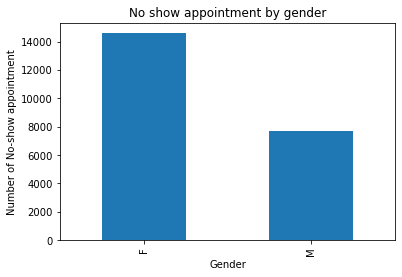

In [36]:
no_show.groupby('Gender')['Age'].count().plot(kind='bar', ylabel='Number of No-show appointment', title='No show appointment by gender');

> Which age group is more diligent in terms of keeping up with appointment?

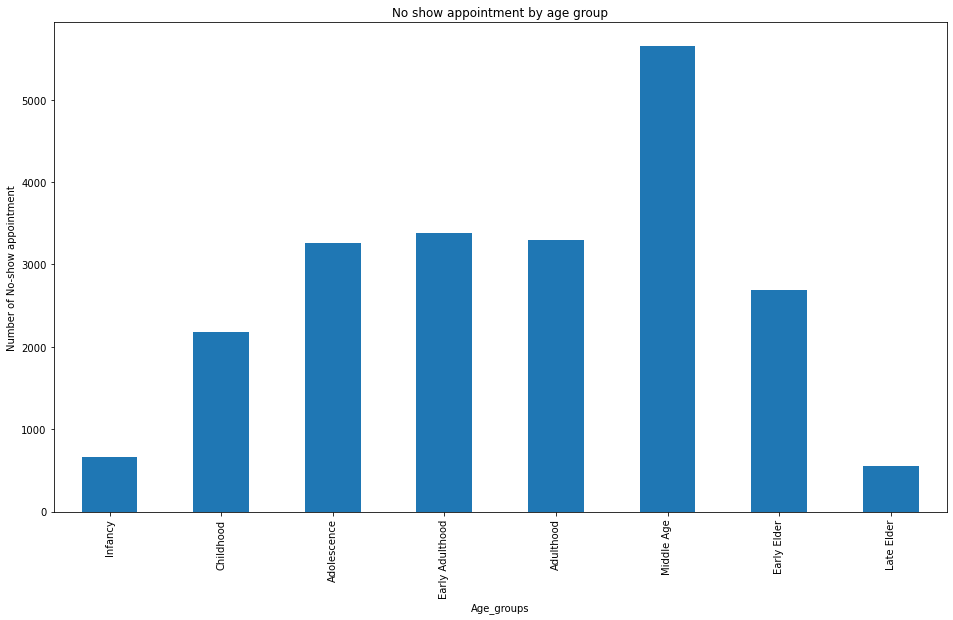

In [37]:
no_show.groupby('Age_groups')['Age'].count().plot(kind='bar', ylabel='Number of No-show appointment', title='No show appointment by age group', figsize=(16, 9));

> What neighbourhood have the highest no-show patients?

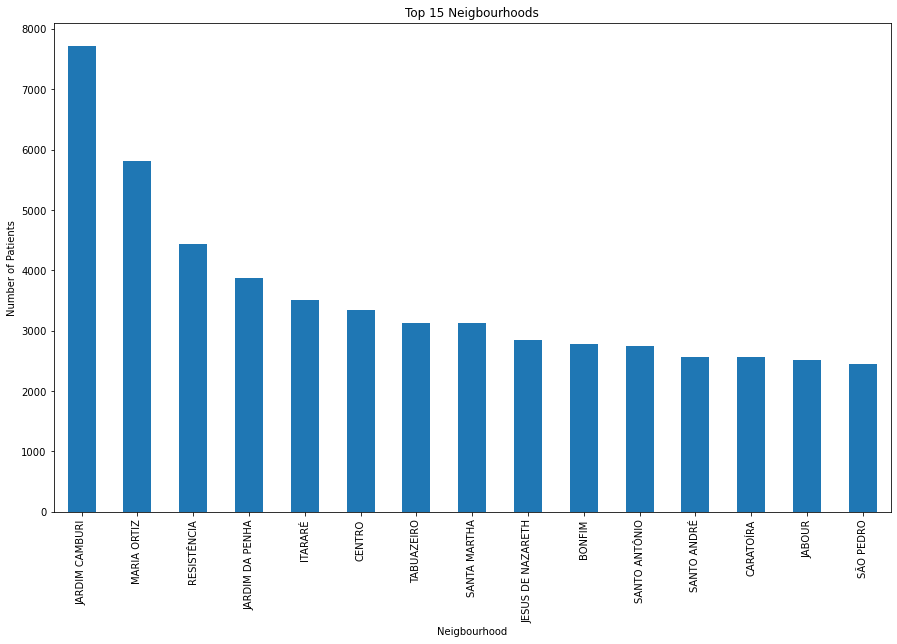

In [38]:
# Top 10 neigbourhoods with the highest number of patients

df.Neighbourhood.value_counts()[:15].plot(kind='bar', figsize=(15, 9), xlabel='Neigbourhood', ylabel='Number of Patients', title='Top 15 Neigbourhoods');